In [1]:

####################################################################################################
####################################################################################################

import sys
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display



In [34]:

####################################################################################################
####################################################################################################

file_in = "./predictions/s2integrals_S2waveforms_dnn.pkl"
df      = pd.read_pickle(file_in)
df      = df[df['s2_true'] != 0]

#print(df.shape)
#display(df[0:5][:])
#print()


In [40]:

####################################################################################################
####################################################################################################

arr_true = df[:]['s2_true'].as_matrix()
arr_pred = df[:]['s2_pred'].as_matrix()
arr_err  = arr_true - arr_pred


####################################################################################################
####################################################################################################

err_min = np.amin(arr_err)
err_max = np.amax(arr_err)

print("Min Error: " + str(err_min))
print("Max Error: " + str(err_max))

err_min = -5
err_max = 5
bins    = 200

eps = 0.1
arr_err[arr_err < err_min] = err_min + eps
arr_err[arr_err > err_max] = err_max - eps

err_mean  = np.mean(arr_err)
err_std   = np.std(arr_err)
err_label = '%5s (std: %.02f, mean: %.02f)' % ( 'S2 Integral Error', err_std  , err_mean   )



Min Error: -7.29672145844
Max Error: 17.8131713867


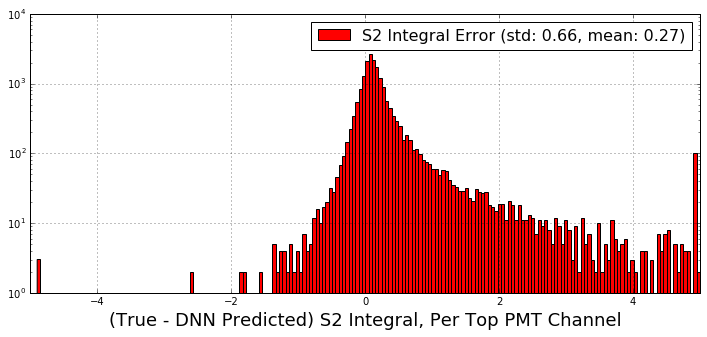

In [41]:

w, h = 12, 5

####################################################################################################
# Resolution - Prediction
####################################################################################################

f = plt.figure(figsize=(w, h))
plt.hist(arr_err, bins=bins, label=err_label, color='r')
plt.xlim([err_min, err_max])
#plt.ylim([0, 1.15*plt.gca().get_ylim()[1]])
#plt.title('X True - X Predicted (Barge NN)', fontsize=18)
plt.xlabel('(True - DNN Predicted) S2 Integral, Per Top PMT Channel', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)
plt.yscale('log')

